In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, LSTM
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import ModelCheckpoint
from scipy import stats
from keras.layers import Dense, Dropout

# Rest of your code...


In [15]:
XchTrain = np.load("G:/The-Yoga-Guru-master/DATASET/trainX.npy")
YTrain = np.load("G:/The-Yoga-Guru-master/DATASET/trainY.npy")
XchVal = np.load("G:/The-Yoga-Guru-master/DATASET/valX.npy")
YVal = np.load("G:/The-Yoga-Guru-master/DATASET/valY.npy")
XchTest = np.load("G:/The-Yoga-Guru-master/DATASET/testX.npy")
YTest = np.load("G:/The-Yoga-Guru-master/DATASET/testY.npy")
# making test and train labels one hot
YintTrain = np.int64(YTrain)
YhotTrain = np.zeros((YTrain.shape[0], 6))
YhotTrain[np.arange(YTrain.shape[0]), YintTrain] = 1

YintTest = np.int64(YTest)
YhotTest = np.zeros((YTest.shape[0], 6))
YhotTest[np.arange(YTest.shape[0]), YintTest] = 1

YintVal = np.int64(YVal)
YhotVal = np.zeros((YVal.shape[0], 6))
YhotVal[np.arange(YVal.shape[0]), YintVal] = 1

YhotTest = np.repeat(YhotTest[:, :, np.newaxis], 45, axis=2)
YhotTest = np.swapaxes(YhotTest, 1, 2)

YhotVal = np.repeat(YhotVal[:, :, np.newaxis], 45, axis=2)
YhotVal = np.swapaxes(YhotVal, 1, 2)

YhotTrain = np.repeat(YhotTrain[:, :, np.newaxis], 45, axis=2)
YhotTrain = np.swapaxes(YhotTrain, 1, 2)

In [16]:
print (XchTrain.shape)
print (YhotTrain.shape)
print (XchVal.shape)
print (YhotVal.shape)
print (XchTest.shape)
print (YhotTest.shape)

(7989, 45, 18, 2)
(7989, 45, 6)
(2224, 45, 18, 2)
(2224, 45, 6)
(2598, 45, 18, 2)
(2598, 45, 6)


In [20]:
def get_model():
    model = Sequential([
        TimeDistributed(Conv1D(32,3, activation='relu', padding = "same"),input_shape=XchTrain.shape[1:]),
        TimeDistributed(BatchNormalization()),
        #TimeDistributed(MaxPooling1D()),
        TimeDistributed(Dropout(0.8)),
        #TimeDistributed(Conv1D(64,3, activation='relu',padding = "same")),
        BatchNormalization(),
        #TimeDistributed(Dropout(0.8)),
        TimeDistributed(Flatten()),
        #TimeDistributed(Dense(30,activation='softmax')),  
        LSTM(20,unit_forget_bias = 0.7, return_sequences = True),
        TimeDistributed(Dense(6,activation='softmax'))        
    ])
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [75]:
model = get_model()
filepath= "G:/The-Yoga-Guru-master/weights/" +"val-org" + "-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(XchTrain, YhotTrain, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data = (XchVal, YhotVal))

Epoch 1/100


KeyboardInterrupt: 

In [24]:
model = get_model()
filepath = "G:/The-Yoga-Guru-master/weights/val-org-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(XchTrain, YhotTrain, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(XchVal, YhotVal))


Epoch 1/10
249/250 [============================>.] - ETA: 0s - loss: 0.2837 - accuracy: 0.9267
Epoch 1: val_accuracy improved from -inf to 0.97645, saving model to G:/The-Yoga-Guru-master/weights\val-org-01-0.9764.hdf5
250/250 [==============================] - 20s 65ms/step - loss: 0.2831 - accuracy: 0.9269 - val_loss: 0.0879 - val_accuracy: 0.9764
Epoch 2/10
249/250 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9823
Epoch 2: val_accuracy improved from 0.97645 to 0.99892, saving model to G:/The-Yoga-Guru-master/weights\val-org-02-0.9989.hdf5
250/250 [==============================] - 16s 63ms/step - loss: 0.0646 - accuracy: 0.9823 - val_loss: 0.0152 - val_accuracy: 0.9989
Epoch 3/10
249/250 [============================>.] - ETA: 0s - loss: 0.0378 - accuracy: 0.9898
Epoch 3: val_accuracy did not improve from 0.99892
250/250 [==============================] - 16s 63ms/step - loss: 0.0378 - accuracy: 0.9898 - val_loss: 0.0114 - val_accuracy: 0.9985
Epoch 4/10


In [27]:
model_history = model.fit(XchTrain, YhotTrain, epochs=5, batch_size=32, callbacks=callbacks_list, validation_data=(XchVal, YhotVal))


Epoch 1/5
249/250 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9975
Epoch 1: val_accuracy did not improve from 0.99907
250/250 [==============================] - 17s 68ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0044 - val_accuracy: 0.9988
Epoch 2/5
249/250 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9980
Epoch 2: val_accuracy did not improve from 0.99907
250/250 [==============================] - 16s 63ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0062 - val_accuracy: 0.9980
Epoch 3/5
249/250 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9982
Epoch 3: val_accuracy did not improve from 0.99907
250/250 [==============================] - 16s 65ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0049 - val_accuracy: 0.9985
Epoch 4/5
249/250 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9982
Epoch 4: val_accuracy did not improve from 0.99907
250/250 [========

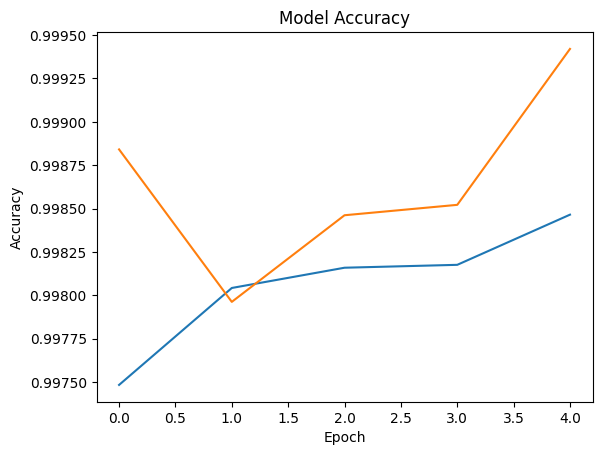

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('figure.png')




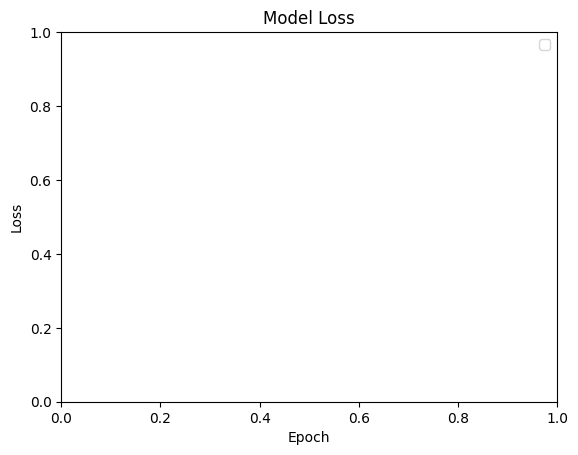

In [37]:

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('accHighorg.png')

# # Plot loss

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('lossHighorg.png')

In [38]:
model = get_model()
#load best weights from current training
model.load_weights("weights/val-100-0.9997.hdf5")

In [39]:
preds = model.predict(XchTest)

82/82 [==============================] - 3s 17ms/step


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm = cm
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
Yhot_pred = model.predict(XchTest)
#convert them to class numbers


82/82 [==============================] - 2s 17ms/step


In [43]:
Y_pred = np.argmax(preds, axis = 2)
Y_test = np.argmax(YhotTest, axis = 2)
print (Y_pred.shape)
print (Y_test.shape)

(2598, 45)
(2598, 45)


In [78]:
# Calculate the test accuracy
test_accuracy = ans / (Y_test.shape[0] * Y_test.shape[1])
test_accuracy_percentage = test_accuracy * 100

# Print the test accuracy
print("Test Accuracy Framewise is")
print(test_accuracy_percentage)


Test Accuracy Framewise is
1.2043452228209734


In [47]:
# use polling of 45 frames to get output for the sequence
ans = 0
res = []
act = []
for i in range(Y_test.shape[0]):
    resTemp = stats.mode(Y_pred[i])
    actTemp = stats.mode(Y_test[i])
    res.append(resTemp[0])
    act.append(actTemp[0])
    if res[i] == act[i]:
        ans = ans + 1
    """for j in range(Y_test.shape[1]):
        if Y_test[i][j] != Y_pred[i][j]:
            print Y_pred[i]
            break"""
                
print ("Test Accuracy with Polling is")
#print ans
print(ans/float(Y_test.shape[0])*100)

Test Accuracy with Polling is
54.195535026943794


In [49]:
print (res)

[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64),

In [50]:
Y_pred_flat = []
Y_test_flat = []
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            Y_pred_flat.append(Y_pred[i][j])
            Y_test_flat.append(Y_test[i][j])

In [66]:
import numpy as np

# Assuming `asanas` is a dictionary with keys and corresponding values
asanas = {(0,): 'Asana1', (1,): 'Asana2', (2,): 'Asana3'}

# Assuming `act` is an array of keys (numpy.ndarray)
act = np.array([(0,), (1,), (2,)])

# Convert numpy.ndarray keys to tuples
act_keys = [tuple(a) for a in act]

# Access corresponding values from the `asanas` dictionary using the converted keys
Y_asanas = np.array([asanas[a] for a in act_keys])

print(Y_asanas)



['Asana1' 'Asana2' 'Asana3']


In [71]:
import numpy as np

asanas = {0: 'bhujangasan', 1: 'padamasan', 2: 'shavasan', 3: 'tadasan', 4: 'trikonasan', 5: 'vrikshasan'}

# Uncomment for framewise
# Y_asanas = np.array([asanas[a] for a in Y_test_flat])
# Y_pred_asanas = np.array([asanas[a] for a in Y_pred_flat])

print("Contents of 'act' array:")
print(act)

Y_asanas = np.array([asanas[a[0]] for a in act])
Y_pred_asanas = np.array([asanas[a[0]] for a in res])

print("Y_asanas:")
print(Y_asanas)
print("Y_pred_asanas:")
print(Y_pred_asanas)




Contents of 'act' array:
[[0]
 [1]
 [2]]
Y_asanas:
['bhujangasan' 'padamasan' 'shavasan']
Y_pred_asanas:
['bhujangasan' 'bhujangasan' 'bhujangasan' ... 'tadasan' 'tadasan'
 'tadasan']


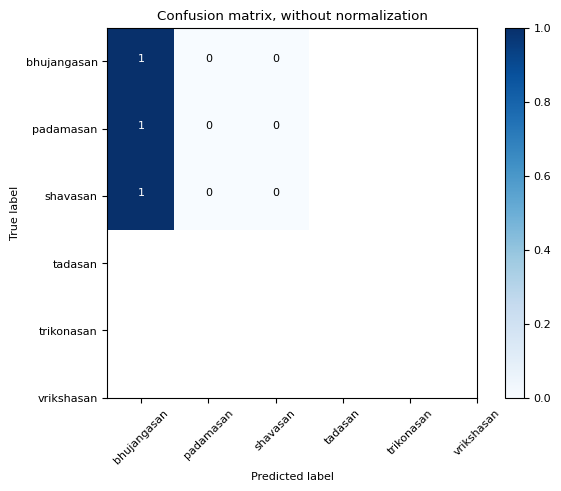

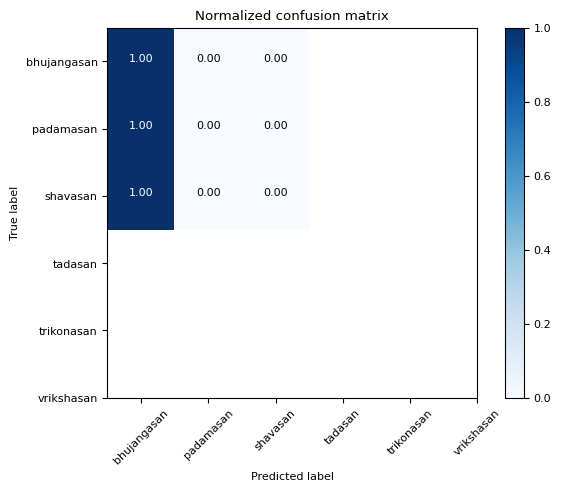

In [73]:
plt.rcParams.update({'font.size': 8})
class_names = []
for k in range(6):
    class_names.append(asanas[k])
    
# Select the first 3 predictions from Y_pred_asanas
Y_pred_asanas = Y_pred_asanas[:3]

cnf_matrix = confusion_matrix(Y_asanas, Y_pred_asanas)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confHighOrgSeq.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('nconfHighOrgSeq.png')


In [ ]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
#plt.savefig('accHighorg.svg')

# # Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
#plt.savefig('lossHighorg.svg')